<a href="https://colab.research.google.com/github/ykitaguchi77/Colab_Scripts/blob/master/mediapipe_hand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mediapipe

import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

import cv2

#サポートパッチのインポート
from google.colab.patches import cv2_imshow

     |████████████████████████████████| 32.2MB 96kB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Handedness: [classification {
  index: 0
  score: 0.9993529915809631
  label: "Left"
}
]
hand_landmarks: landmark {
  x: 0.254354327917099
  y: 0.6686871647834778
  z: -8.263654308393598e-05
}
landmark {
  x: 0.2764633297920227
  y: 0.47916415333747864
  z: 0.03725258633494377
}
landmark {
  x: 0.3358249366283417
  y: 0.3499926030635834
  z: 0.03278333693742752
}
landmark {
  x: 0.4005925953388214
  y: 0.23790672421455383
  z: 0.027753733098506927
}
landmark {
  x: 0.44060978293418884
  y: 0.15249508619308472
  z: 0.027159856632351875
}
landmark {
  x: 0.49449029564857483
  y: 0.4959830641746521
  z: -0.03097914159297943
}
landmark {
  x: 0.6290155649185181
  y: 0.42385363578796387
  z: -0.04908476397395134
}
landmark {
  x: 0.7110908627510071
  y: 0.3859519362449646
  z: -0.06804762780666351
}
landmark {
  x: 0.7736828327178955
  y: 0.35543763637542725
  z: -0.07922796905040741
}
landmark {
  x: 0.5166419148445129
  y: 0.612238347530365
  z: -0.03199268504977226
}
landmark {
  x: 0.67

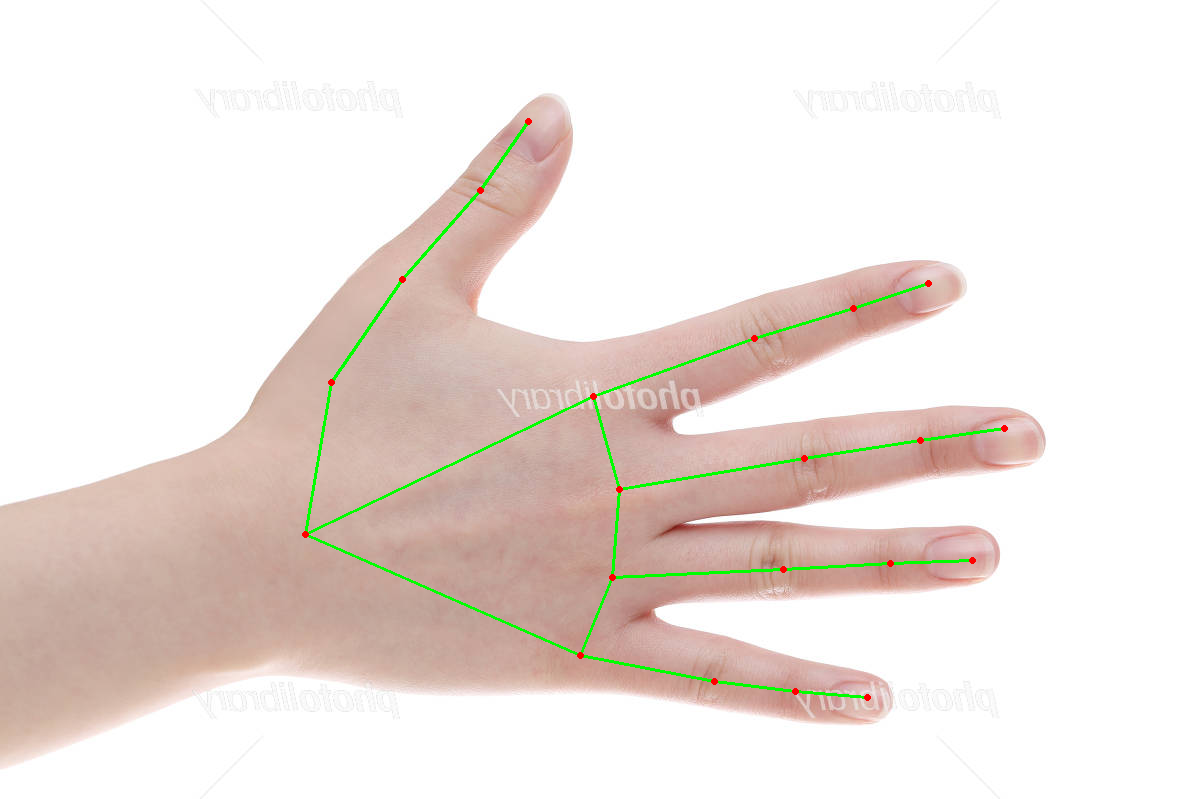

In [3]:
# For static images:
IMAGE_FILES = ['/content/drive/MyDrive/Deep_learning/hand.jpg']
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5) as hands:
  for idx, file in enumerate(IMAGE_FILES):
    # Read an image, flip it around y-axis for correct handedness output (see
    # above).
    image = cv2.flip(cv2.imread(file), 1)
    # Convert the BGR image to RGB before processing.
    results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print handedness and draw hand landmarks on the image.
    print('Handedness:', results.multi_handedness)
    if not results.multi_hand_landmarks:
      continue
    image_height, image_width, _ = image.shape
    annotated_image = image.copy()
    for hand_landmarks in results.multi_hand_landmarks:
      print('hand_landmarks:', hand_landmarks)
      print(
          f'Index finger tip coordinates: (',
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height})'
      )
      mp_drawing.draw_landmarks(
          annotated_image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
    cv2.imwrite(
        '/tmp/annotated_image' + str(idx) + '.png', cv2.flip(annotated_image, 1))
    
cv2_imshow(annotated_image)